In [1]:
__author__ = "@Tssp"
__date__ = "21/09/20"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5))/2
aursize = (5*aur, 5)

In [2]:
delta = np.loadtxt('Simulations/delta_asc_ix6603.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc_ix6603.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky = 2*np.pi/lambd
Iy = 4993 * (1e4 / Eh * to * ao**2)
Vy = alpha * Iy # a.u
Iy = Vy/alpha
wy = np.sqrt( 2 * Vy * ky**2 / mass)       
dho = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
np.sqrt(7190/4993)

1.2000066759945147

In [5]:
folder_path = "Simulations/ix7190_iy4993_iz50/config/"

In [6]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x10000_y10000_z10000_120rm8g2l60m14_68CM8g1L60M14_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix7190_iy4993_iz50_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm200_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.70950', '.70965', '.70970', '.70975', '.70980', '.70985', '.70995', '.71000', '.71005', '.71015', '.71020', '.71035', '.71040', '.71045', '.71055', '.71060', '.71065', '.71085', '.71090', '.71100', '.71110', '.71120', '.71125', '.71130', '.71135', '.71140', '.71145', '.71150', '.71155', '.71160', '.71165', '.71170', '.71195', '.71200'] non readed


In [7]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [8]:
dic = transpose_energies(Data)

In [9]:
dic, least_bound_pos = dic_from_least_bound_forward(dic, wy)

Least bound state:  1001 -0.17161550962676037
First trap state:  1002 0.031137923337031345


In [10]:
for key in dic.keys():
    dic[key] = np.sort(dic[key])

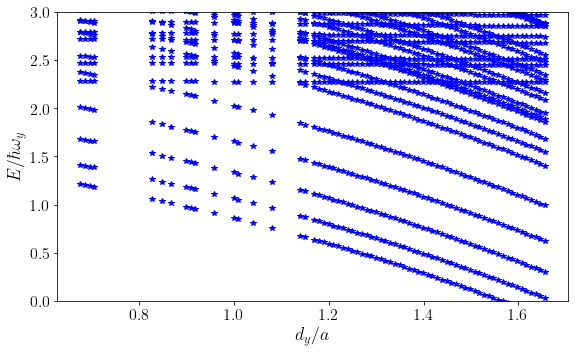

In [11]:
fig, ax = plt.subplots(figsize=aursize)
for i in range(least_bound_pos, least_bound_pos + 30):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b*')
ax.set_ylim(0, 3)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
fig.savefig('Results/Figures/Ix7190_Iy4993_Iz50_Easc.png', dpi=200)
plt.show()

In [12]:
x[16]
delta[16]

'.70780'

# Crosses

In [13]:
%matplotlib inline

Energy in x=1.3590395644667697 for the level 1007 is 1.072038687165983e-10
Energy in x=1.3590395644667697 for the level 1008 is 1.143851987960249e-10
Energy in x=1.3590395644667697 for the level 1009 is 1.177038192640195e-10
Energy in x=1.3590395644667697 for the level 1010 is 1.234611407663626e-10
Energy in x=1.3590395644667697 for the level 1011 is 1.248996280711561e-10
Energy in x=1.3590395644667697 for the level 1012 is 1.271571129470351e-10


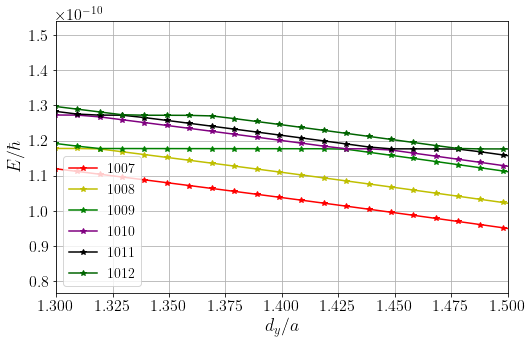

In [14]:
fig2, ax2 = plt.subplots(figsize=aursize)
xpol = np.linspace(x[0], x[-1], num=50)
color = ['b', 'r', 'y', 'g', 'purple', 'k', 'darkgreen']
for i in range(least_bound_pos+6, least_bound_pos + 12):
    print(f"Energy in x={x[30]} for the level {i} is {dic[f'nivel_{i}'][30]}")
    ax2.plot(x, dic['nivel_{}'.format(i)], color=color[i-1006], marker='*')
#ax2.set_ylim(2.270, 2.276)
ax2.set_xlim(1.30, 1.5)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar$')
ax2.legend(['1007', '1008', '1009', '1010', '1011', '1012'], fontsize=14)
plt.grid()
plt.show()

In [15]:
dic['nivel_1010'][-5]

1.406567677792764e-10

In [18]:
%matplotlib

Using matplotlib backend: MacOSX


In [19]:
fig2, ax2 = plt.subplots(figsize=aursize)
for i in range(least_bound_pos + 6, least_bound_pos + 10):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(2.270, 2.276)
ax2.set_xlim(1.18, 1.45)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 40:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

xcoord: [1.1811274663326023, 1.184087065455684, 1.188878797369245, 1.1933886626996553, 1.196771061697463, 1.2008581271531473, 1.2053679924835576, 1.2090322580645159, 1.2469433134982773, 1.2518759787034135, 1.2569495772001251, 1.262164108988412, 1.2672377074851235, 1.2734387723144376, 1.2776667710616973, 1.2834450360162855, 1.2879549013466958, 1.2931694331349826, 1.2982430316316942, 1.3024710303789537, 1.308249295333542, 1.3207923582837455, 1.3275571562793609, 1.332912621359223, 1.3395364860632633, 1.3463012840588786, 1.3509520826808643, 1.3567303476354524, 1.3606764797995614, 1.3657500782962728, 1.3725148762918884, 1.3795615408706543, 1.3859035389915437, 1.392527403695584, 1.3985875352333228, 1.4053523332289382, 1.4132445975571561, 1.4181772627622924, 1.4297337926714686, 1.434243658001879]
 ycoord: [2.275061806517778, 2.2749767066345177, 2.274885060606391, 2.2748654221717923, 2.2747868684333983, 2.274721406984736, 2.274642853246342, 2.2745773917976804, 2.2743024537133003, 2.27421080768

In [20]:
%matplotlib inline

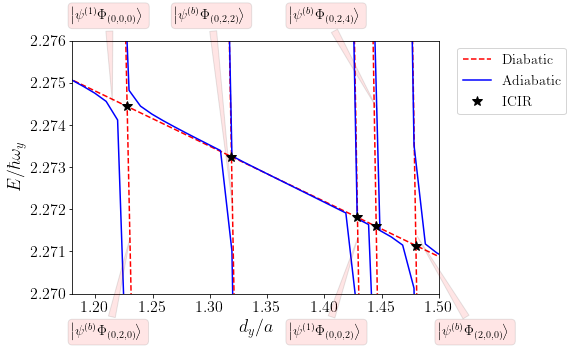

In [48]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1007:
f1007 = np.polyfit(xcoord, ycoord, deg=1)
x1007 = np.linspace(1.15, 1.50, num=40)
ax3.plot(x1007, np.polyval(f1007, x1007), 'r--', markersize=4, label='Diabatic')
ax3.plot(x, dic['nivel_1007']/wy, 'b', label='Adiabatic')

# nivel 1008:
f1008 = np.polyfit(x[(x > 1.07) & (x < 1.23)], np.array(dic['nivel_1008'])[(x > 1.07) & (x < 1.23)]/wy, deg=1)
x1008 = np.linspace(1.21, 1.25, num=100)
ax3.plot(x1008, np.polyval(f1008, x1008), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1008']/wy, 'b')

# nivel 1009:
f1009 = np.polyfit(x[(x > 1.20) & (x < 1.32)], np.array(dic['nivel_1009'])[(x > 1.20) & (x < 1.32)]/wy, deg=1)
x1009 = np.linspace(1.3, 1.34, num=100)
ax3.plot(x1009, np.polyval(f1009, x1009), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1009']/wy, 'b')

# nivel 1010:
f1010 = np.polyfit(x[(x > 1.30) & (x < 1.425)], np.array(dic['nivel_1010'])[(x > 1.30) & (x < 1.425)]/wy, deg=1)
x1010 = np.linspace(1.40, 1.43, num=100)
ax3.plot(x1010, np.polyval(f1010, x1010), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1010']/wy, 'b')

# nivel 1011:
f1011 = np.polyfit(x[(x > 1.34) & (x < 1.44)], np.array(dic['nivel_1011'])[(x > 1.34) & (x < 1.44)]/wy, deg=1)
x1011 = np.linspace(1.40, 1.45, num=100)
ax3.plot(x1011, np.polyval(f1011, x1011), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1011']/wy, 'b')

# nivel 1012:
f1012 = np.polyfit(x[(x > 1.375) & (x < 1.475)], np.array(dic['nivel_1012'])[(x > 1.375) & (x < 1.475)]/wy, deg=1)
x1012 = np.linspace(1.45, 1.50, num=100)
ax3.plot(x1012, np.polyval(f1012, x1012), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1012']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1007, f1008), np.polyval(f1007, cross_points(f1007, f1008)), 'k*', markersize=10, label="ICIR")
ax3.plot(cross_points(f1007, f1009), np.polyval(f1007, cross_points(f1007, f1009)), 'k*', markersize=10)
ax3.plot(cross_points(f1007, f1010), np.polyval(f1007, cross_points(f1007, f1010)), 'k*', markersize=10)
ax3.plot(cross_points(f1007, f1011), np.polyval(f1007, cross_points(f1007, f1011)), 'k*', markersize=10)
ax3.plot(cross_points(f1007, f1012), np.polyval(f1007, cross_points(f1007, f1012)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.231, 2.2714), xytext=(1.18, 2.269), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.215, 2.2745), xytext=(1.18, 2.2765), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.32, 2.272), xytext=(1.27, 2.2765), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,2)}\right>$', xy=(1.43, 2.2714), xytext=(1.37, 2.269), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,4)}\right>$', xy=(1.447, 2.27433), xytext=(1.37, 2.2765), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.48, 2.2717), xytext=(1.50, 2.269), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(2.270, 2.276)
ax3.set_xlim(1.18, 1.50)
plt.tight_layout()
fig3.savefig('Results/Figures/Ix7190_Iy4993_Iz50_Easc_Interpolation.png', dpi=200)

In [53]:
print(f'''Crosses between (x, E):
* 1007-1008: ({cross_points(f1007, f1008)}, {np.polyval(f1007, cross_points(f1007, f1008))})
* 1007-1009: ({cross_points(f1007, f1009)}, {np.polyval(f1007, cross_points(f1007, f1009))})
* 1007-1010: ({cross_points(f1007, f1010)}, {np.polyval(f1007, cross_points(f1007, f1010))})
* 1007-1011: ({cross_points(f1007, f1011)}, {np.polyval(f1007, cross_points(f1007, f1011))})
* 1007-1012: ({cross_points(f1007, f1012)}, {np.polyval(f1007, cross_points(f1007, f1012))})''')

Crosses between (x, E):
* 1007-1008: (1.2278286812755128, 2.274434184279014)
* 1007-1009: (1.3188637698367296, 2.273240663657982)
* 1007-1010: (1.4287804673443103, 2.2717995946466325)
* 1007-1011: (1.4451210850723433, 2.271585360063824)
* 1007-1012: (1.4797626964669628, 2.2711311892798034)


In [54]:
print(f"ICIR: asc/dy = {1/cross_points(f1007, f1008)} and {1/cross_points(f1007, f1012)}")

ICIR: asc/dy = 0.8144458711952908 and 0.6757840310392809


In [55]:
np.savetxt('Results/ICIR_positions_7190_4993_50.txt', 
           [[1.20, 1.20], [1/cross_points(f1007, f1008), 1/cross_points(f1007, f1012)], 
            [np.polyval(f1007, cross_points(f1007, f1008)), np.polyval(f1007, cross_points(f1007, f1012))]], 
           header='wx/wy, asc/dy, E/hwy')